# Proyek Analisis Data: Bike-sharing-dataset
* Nama        : Muhammad Iqbal Yusuf
* Email       : iqbalyusuf0398@gmail.com
* Id Dicoding : miqbalyusuf

# Menentukan Pertanyaan Bisnis
* Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?
* Bagaimana rerata jam penyewaan sepeda pada hari kerja dengan weekend/holiday?

# Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

## Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [7]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [11]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

### Memperbaiki tipe data dteday tabel day_df

In [12]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [14]:
day_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Memperbaiki tipe data dteday tabel hour_df

In [15]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [16]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [17]:
hour_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Exploratory Data Analysis (EDA)

### Explore day_df

In [18]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
day_df.describe(include="all")

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_12932\282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [20]:
# Perbandingan jumlah penyewa casual dengan registered berdasarkan musim
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "casual": ["min","max"],
    "registered": ["min","max"]
})

dteday casual       registered      
       nunique    min   max        min   max
season                                      
1          181      9  3155        416  5315
2          184    120  3410        674  6456
3          188    118  3160        889  6917
4          178      2  3031         20  6946

In [21]:
# Perbandingan jumlah penyewa casual dengan registered berdasarkan musim
day_df.groupby(by="season").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,dteday,casual,registered,cnt
season,,,,
3,188,226091,835038,1061129
2,184,203522,715067,918589
4,178,129782,711831,841613
1,181,60622,410726,471348


In [22]:
# Perbandingan jumlah penyewa berdasarkan cuaca
day_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "casual": ["min","max"],
    "registered": ["min","max"]
})

dteday casual       registered      
           nunique    min   max        min   max
weathersit                                      
1              463     15  3410        416  6946
2              247      9  3155        491  6844
3               21      2  1264         20  4324

In [23]:
# Perbandingan jumlah penyewa berdasarkan cuaca
day_df.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,dteday,casual,registered,cnt
weathersit,,,,
1,463,446346,1811606,2257952
2,247,169776,827082,996858
3,21,3895,33974,37869


In [24]:
# Perbandingan jumlah penyewa berdasarkan tahun
day_df.groupby(by="yr").agg({
    "dteday": "nunique",
    "casual": ["min","max"],
    "registered": ["min","max"]
})

dteday casual       registered      
   nunique    min   max        min   max
yr                                      
0      365      9  3065        416  4614
1      366      2  3410         20  6946

In [25]:
# Perbandingan jumlah penyewa berdasarkan tahun
day_df.groupby(by="yr").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,dteday,casual,registered,cnt
yr,,,,
1,366,372765,1676811,2049576
0,365,247252,995851,1243103


In [26]:
# Perbandingan jumlah penyewa berdasarkan bulan
day_df.groupby(by="mnth").agg({
    "dteday": "nunique",
    "casual": ["min","max"],
    "registered": ["min","max"]
})

dteday casual       registered      
     nunique    min   max        min   max
mnth                                      
1         62      9  1070        416  4185
2         57     47  1435        905  4546
3         62     46  3155        491  5893
4         60    120  3252        674  5950
5         62    255  3410       2213  6433
6         60    477  2963       2993  6456
7         62    562  3065       2298  6790
8         62    226  2827        889  6541
9         60    118  3160       1689  6946
10        62      2  3031         20  6911
11        60     69  2290        935  5520
12        62      9  1153        432  6055

In [27]:
# Perbandingan jumlah penyewa berdasarkan bulan
day_df.groupby(by="mnth").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,dteday,casual,registered,cnt
mnth,,,,
8,62,72039,279155,351194
6,60,73906,272436,346342
9,60,70323,275668,345991
7,62,78157,266791,344948
5,62,75285,256401,331686
10,62,59760,262592,322352
4,60,60802,208292,269094
11,60,36603,218228,254831
3,62,44444,184476,228920


In [28]:
# Perbandingan jumlah penyewa berdasarkan hari
day_df.groupby(by="weekday").agg({
    "holiday": "sum",
    "workingday": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,holiday,workingday,cnt
weekday,,,
5,2,102,487790
4,2,102,485395
6,0,0,477807
3,1,103,473048
2,1,103,469109
1,15,90,455503
0,0,0,444027


In [29]:
# Explore day_df
day_df.groupby(by=["yr","season","weathersit"]).agg({
    "holiday": "sum",
    "workingday": "sum",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

holiday  workingday  casual  registered     cnt
yr season weathersit                                                 
0  1      1                 1          35   16540       82995   99535
          2                 2          23    4805       44531   49336
          3                 0           2      80        1049    1129
   2      1                 2          36   50941      169382  220323
          2                 0          27   26323       98190  124513
          3                 0           1     300        2180    2480
   3      1                 0          46   71488      237662  309150
          2                 2          17   23487       80465  103952
          3                 0           3     475        6073    6548
   4      1                 3          30   38303      167756  206059
          2                 0          23   13372       91751  105123
          3                 0           7    1138       13817   14955
1  1      1                 3          35   25022      187479  212501
          2                 1          24   13974       92263  106237
          3                 0           1     201        2409    2610
   2      1                 2          41   95447      311216  406663
          2                 0          23   30391      133192  163583
          3                 0           0     120         907    1027
   3      1                 2          51   96457      393836  490293
          2                 0          14   32920      113807  146727
          3                 0           0    1264        3195    4459
   4      1                 2          33   52148      261280  313428
          2                 1          26   24504      172883  197387
          3                 0           2     317        4344    4661

### Explore hour_df

In [30]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
hour_df.describe(include="all")

C:\Users\Iqbal\AppData\Local\Temp\ipykernel_12932\1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [48]:
# Perbandingan penyewa berdasarkan hr
hour_df.groupby(by="hr").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,dteday,casual,registered,cnt
hr,,,,
17,730,54220,282640,336860
18,728,44496,265276,309772
8,727,15761,245240,261001
16,730,53834,173914,227748
19,728,35505,191284,226789
13,729,52713,132206,184919
12,728,49718,134696,184414
15,729,54606,128543,183149
14,729,55089,120563,175652


In [33]:
# rata-rata jam sewa berdasarkan musim
hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "hr": "mean"
}).sort_values(by="hr", ascending=False)

,casual,registered,hr
season,,,
1,60622,410726,11.648515
4,129782,711831,11.522448
2,203522,715067,11.512134
3,226091,835038,11.507562


In [34]:
# rata-rata jam sewa berdasarkan hari libur
hour_df.groupby(by="holiday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "hr": "mean"
}).sort_values(by="hr", ascending=False)

,dteday,casual,registered,hr
holiday,,,,
1,21,22359,56076,11.566000
0,710,597658,2616586,11.546182


In [35]:
# rata-rata jam sewa berdasarkan hari kerja
hour_df.groupby(by="workingday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "hr": "mean"
}).sort_values(by="hr", ascending=False)

,dteday,casual,registered,hr
workingday,,,,
1,500,303285,1989125,11.557522
0,231,316732,683537,11.523576


In [36]:
# Explore hour_df
hour_df.groupby(by=["yr","season","weathersit"]).agg({
    "holiday": "sum",
    "workingday": "sum",
    "cnt": "sum",
    "hr": "mean"
})

holiday  workingday     cnt         hr
yr season weathersit                                        
0  1      1                25         838   99773  11.956154
          2                35         390   43430  11.310169
          3                11         131    6761  11.847458
          4                 0           1      36  16.000000
   2      1                37         952  239090  11.789589
          2                11         412   85481  11.051613
          3                 0         168   22745  11.136986
   3      1                15        1136  319102  11.595077
          2                29         338   83126  11.044872
          3                 4         107   17422  12.129252
   4      1                65         820  217088  11.522861
          2                 7         424   88482  11.314815
          3                 0         194   20567  11.865546
1  1      1                64         876  225505  11.907692
          2                27         421   80775  10.746341
          3                 2         136   14881  11.468750
          4                 0           1     187   9.500000
   2      1                46        1023  425373  11.743144
          2                 2         373  121882  10.656489
          3                 0         138   24018  12.005348
   3      1                37        1164  482839  11.623565
          2                11         330  129806  10.609603
          3                 0          66   28834  13.319672
   4      1                52         823  329403  11.776536
          2                15         503  162970  10.903955
          3                 5         100   23103  12.613139

# Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?

In [37]:
day_df.groupby(by=["yr","season"]).agg({
    "cnt" : "sum"
})

cnt
yr season        
0  1       150000
   2       347316
   3       419650
   4       326137
1  1       321348
   2       571273
   3       641479
   4       515476

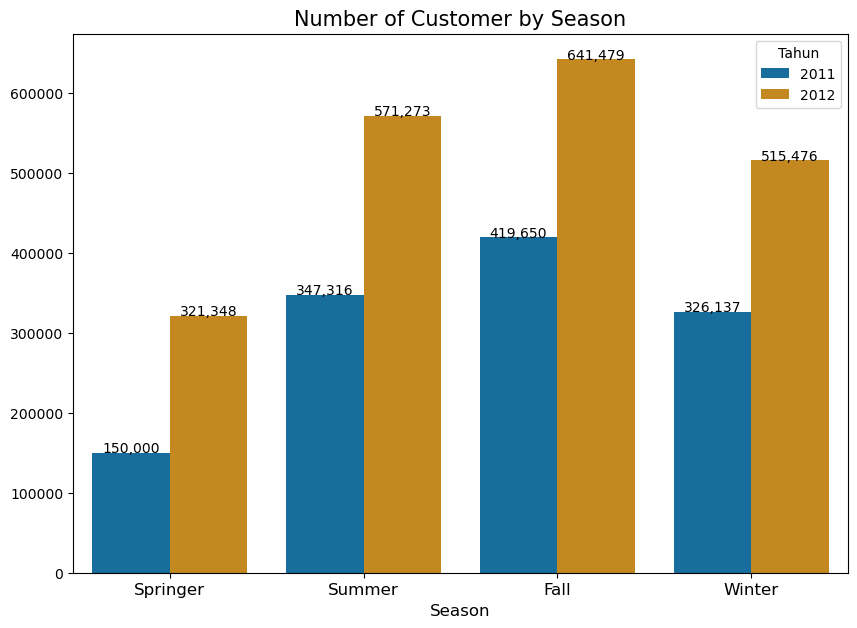

In [38]:
plt.figure(figsize=(10,7))

ax=sns.barplot(
    y="cnt",
    x="season",
    hue="yr",
    data=day_df,
    palette='colorblind',
    hue_order=[0, 1],
    errorbar=None,
    estimator=sum,
)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height()):,}',
            ha='center', va='baseline', fontsize=10, color='black')

new_labels = ['Springer', 'Summer', 'Fall', 'Winter']
plt.xticks(ticks=plt.xticks()[0], labels=new_labels)
plt.legend(title="Tahun", labels=['2011', '2012'])
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel('Season', fontsize=12)
plt.tick_params(axis='x', labelsize=12)

In [39]:
hour_df.groupby(by=["yr","weathersit"]).agg({
    "cnt" : "sum"
})

cnt
yr weathersit         
0  1            875053
   2            300519
   3             67495
   4                36
1  1           1463120
   2            495433
   3             90836
   4               187

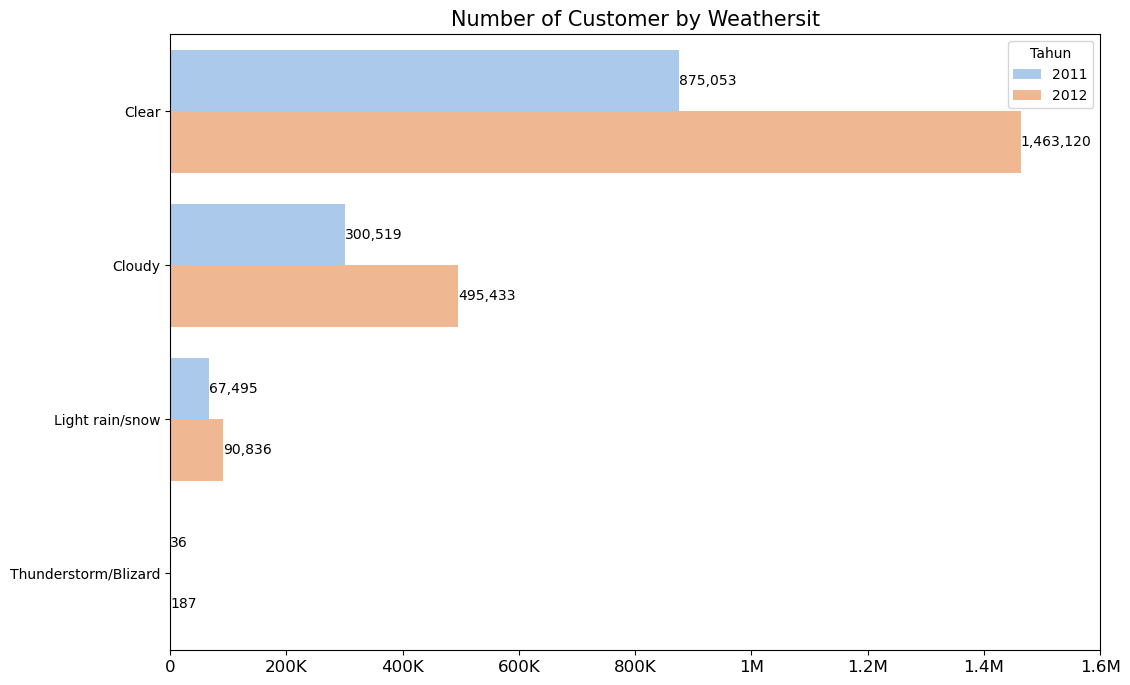

In [40]:
plt.figure(figsize=(12,8))

ax=sns.barplot(
    y="weathersit",
    x="cnt",
    hue="yr",
    data=hour_df,
    palette='pastel',
    hue_order=[0, 1],
    errorbar=None,
    estimator=sum,
    orient='h'
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.xticks(ticks=[0, 200000, 400000, 600000, 800000, 1000000, 
                  1200000, 1400000, 1600000],
          labels=['0', '200K', '400K', '600K', '800K', '1M', '1.2M',
                  '1.4M', '1.6M'])

new_labels = ['Clear', 'Cloudy', 'Light rain/snow', 'Thunderstorm/Blizard']
plt.yticks(ticks=plt.yticks()[0], labels=new_labels)
plt.legend(title="Tahun", labels=['2011', '2012'])
plt.title("Number of Customer by Weathersit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

### Pertanyaan 2: Bagaimana rerata jam penyewaan sepeda pada workingday dengan weekend/holiday?

In [41]:
# rata-rata jam sewa berdasarkan hari kerja
hour_df.groupby(by=["yr","workingday"]).agg({
    "hr": "mean"
}).sort_values(by="hr", ascending=False)

hr
yr workingday           
0  1           11.591440
   0           11.535113
1  1           11.523850
   0           11.512230

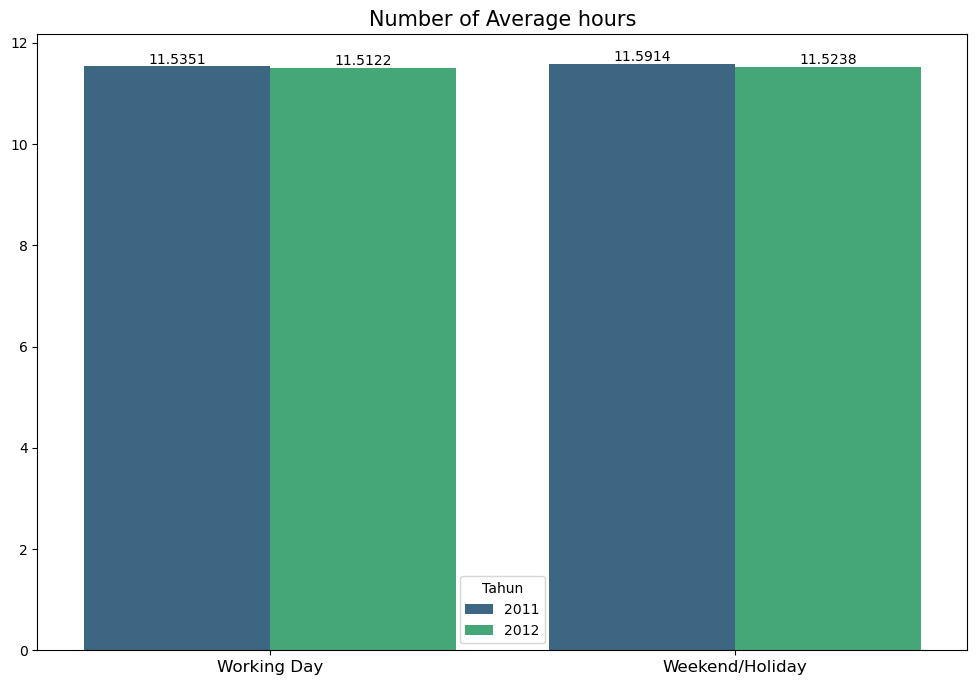

In [42]:
plt.figure(figsize=(12,8))

ax=sns.barplot(
    y="hr",
    x="workingday",
    hue="yr",
    data=hour_df,
    palette='viridis',
    hue_order=[0, 1],
    errorbar=None
)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
new_labels = ['Working Day', 'Weekend/Holiday']
plt.xticks(ticks=plt.xticks()[0], labels=new_labels)
plt.legend(title="Tahun", labels=['2011', '2012'])
plt.title("Number of Average hours", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

# Conclusion
### Konklusi pertanyaan 1: Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?
* Berdasarkan hasil ekplorasi dapat ditarik kesimpulan bahwa penyewaan sepeda paling banyak ke rendah yaitu pada musim gugur, panas, dingin, semi. Musim gugur menjadi musim dengan penyewaan paling banyak, sedangkan musim semi menjadi musim dengan penyewaan paling sedikit. Hal ini cukup mengejutkan karena musim dingin memiliki jumlah penyewaan lebih banyak daripada musim semi. Selain itu, terdapat kenaikan jumlah penyewa yg cukup ditahun berikutnya namun tidak merubah posisi jumlah penyewa antar musim.
* Selanjutnya, untuk jumlah penyewa sepeda berdasarkan cuaca menunjukkan jumlah penyewaan sepeda dari banyak ke rendah yaitu ketika cuaca cerah, berawan, hujan/salju ringan, dan hujan lebat/badai. Tren data ini menunjukkan kesesuaian antara banyaknya pengguna sepeda dibandingkan dengan kondisi cuaca.

### Konklusi pertanyaan 2: Bagaimana rerata jam penyewaan sepeda pada workingday dengan weekend/holiday?
* Berdasarkan hasil eksplorasi dapat ditarik kesimpulan bahwa jumlah rata-rata jam penyewaan sepeda ketika hari kerja dengan weekend/libur menunjukkan perbedaan yang tidak signifikan dengan rata-rata lebih banyak penyewa pada weekend/libur meskipun jumlah hari weekend/libur lebih sedikit ketimbang hari kerja. Tren data ini menunjukkan kemungkinan bahwa pengguna lebih banyak menyewa dihari weekend/libur untuk kebutuhan olahraga/hiburan.